In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
size = [str(16384), str(32768), str(65536),str(131072), str(262144), str(524288)]
iterations = 2e06
def ESS(n):
    total_acf = acf(n, nlags = len(n)-1, fft = True)
    return len(n)/(1+2*np.sum(total_acf))

/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


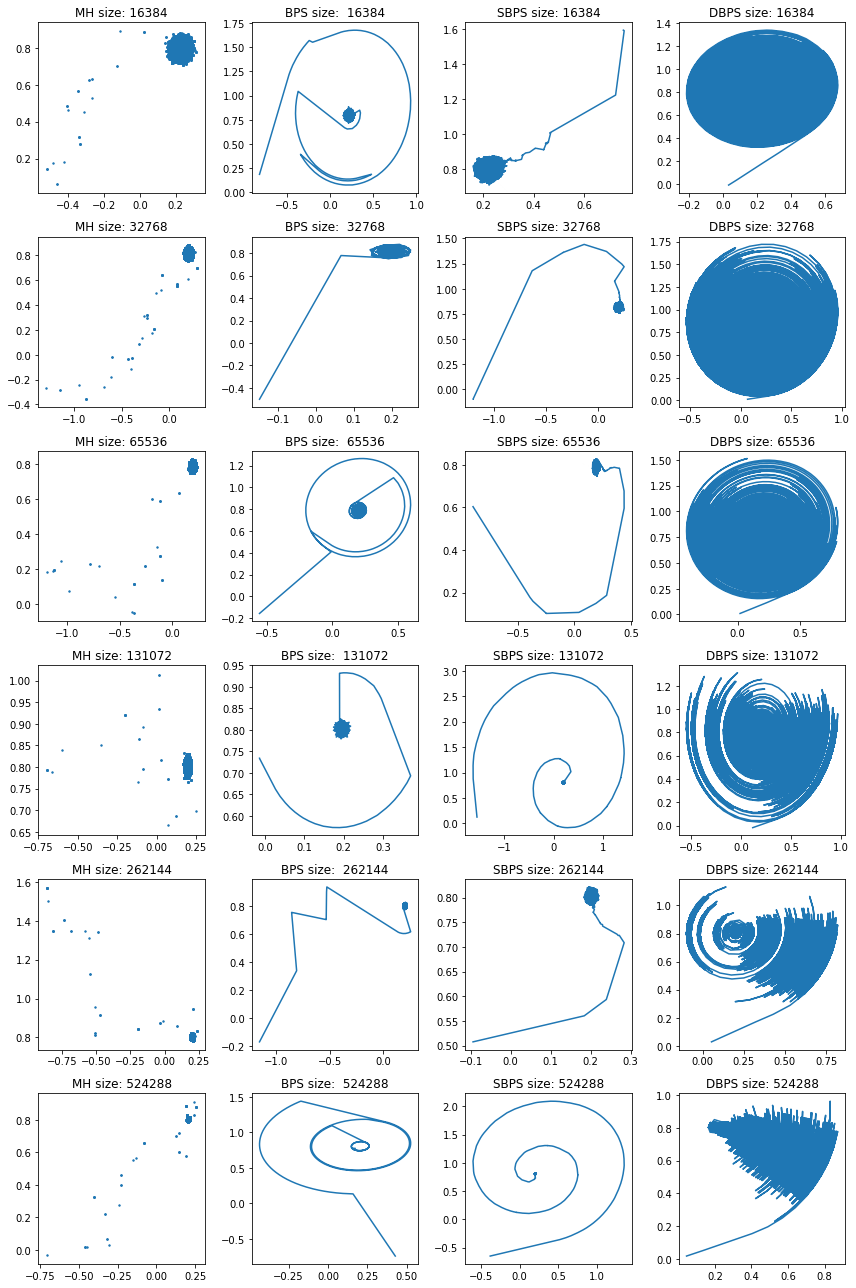

In [4]:
fig, axs = plt.subplots(6,4, figsize=(12,18), tight_layout=True)
for i in range(len(size)):
    MH = np.load('mh_BLR_iterations_2e06_datasize_' + str(size[i]) + '.npy')
    BPS = np.load('bps_BLR_iterations_2e06_datasize_' + str(size[i]) + '.npy')
    SBPS = np.load('sbps_BLR_iterations_2e06_datasize_' + str(size[i]) + '.npy')
    DBPS = np.load('dbps_BLR_iterations_2e06_datasize_' + str(size[i]) + '.npy')
    axs[i][0].scatter(MH[:,0], MH[:,1], s=2)
    axs[i][0].title.set_text('MH size: ' + str(size[i]))
    axs[i][1].plot(BPS[:,0], BPS[:,1])
    axs[i][1].title.set_text('BPS size:  ' + str(size[i]))
    axs[i][2].plot(SBPS[:,0], SBPS[:,1])
    axs[i][2].title.set_text('SBPS size: ' + str(size[i]))
    axs[i][3].plot(DBPS[:,0], DBPS[:,1])
    axs[i][3].title.set_text('DBPS size: ' + str(size[i]))

/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


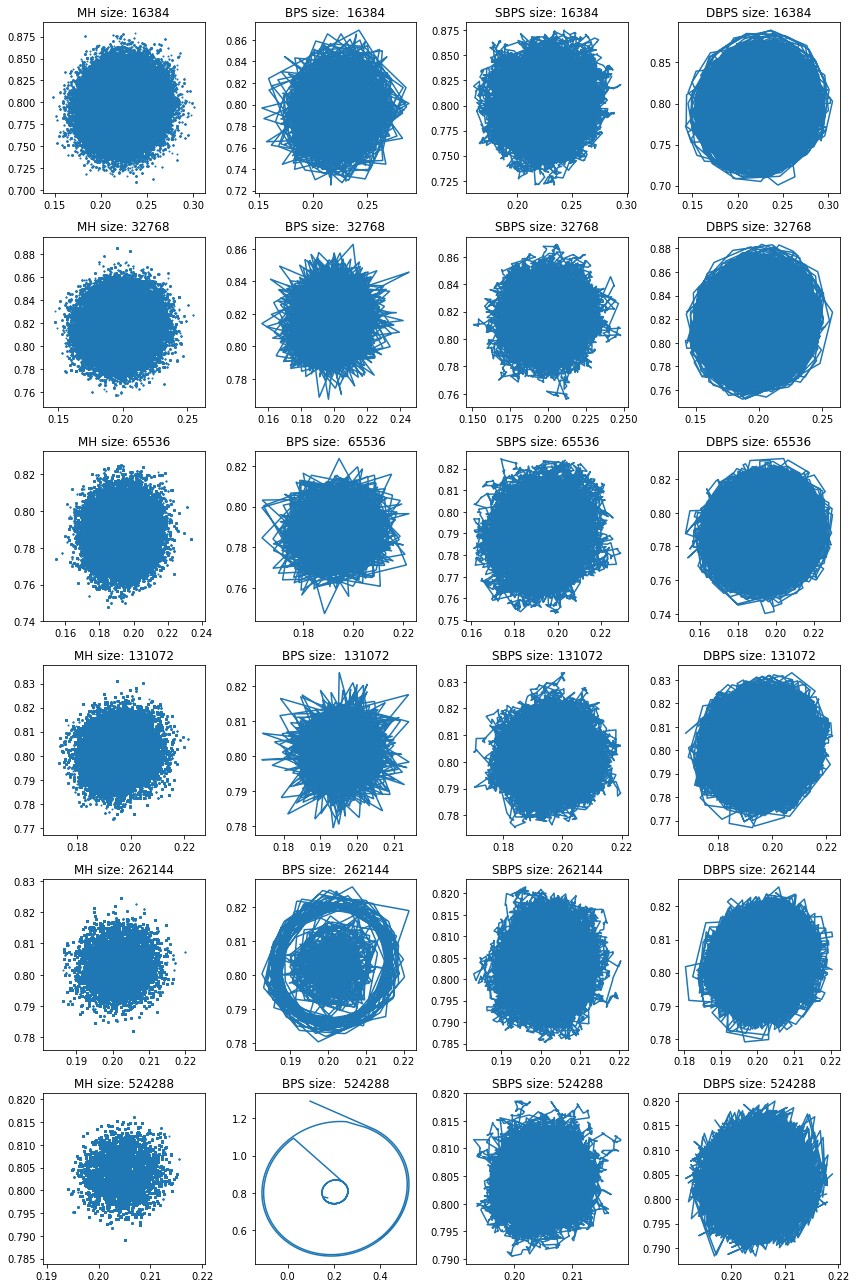

In [23]:
mpl.rcParams['agg.path.chunksize'] = 10000
fig, axs = plt.subplots(6,4, figsize=(12,18), tight_layout=True)
MHsetting = np.load('MHsetting.npy')
BPSsetting = np.load('BPSsetting.npy')
SBPSsetting = np.load('SBPSsetting.npy')
DBPSsetting = np.load('DBPSsetting.npy')
for i in range(len(size)):
    MH = np.load('mh_BLR_iterations_2e06_datasize_' + str(size[i]) + '.npy')[int(MHsetting[i][2]):]
    BPS = np.load('bps_BLR_iterations_2e06_datasize_' + str(size[i]) + '.npy')[int(BPSsetting[i][4]):]
    SBPS = np.load('sbps_BLR_iterations_2e06_datasize_' + str(size[i]) + '.npy')[int(SBPSsetting[i][4]):]
    DBPS = np.load('dbps_BLR_iterations_2e06_datasize_' + str(size[i]) + '.npy')[int(DBPSsetting[i][2]):]
    axs[i][0].scatter(MH[:,0], MH[:,1], s = 1)
    axs[i][0].title.set_text('MH size: ' + str(size[i]))
    axs[i][1].plot(BPS[:,0], BPS[:,1])
    axs[i][1].title.set_text('BPS size:  ' + str(size[i]))
    axs[i][2].plot(SBPS[:,0], SBPS[:,1])
    axs[i][2].title.set_text('SBPS size: ' + str(size[i]))
    axs[i][3].plot(DBPS[:,0], DBPS[:,1])
    axs[i][3].title.set_text('DBPS size: ' + str(size[i]))

In [6]:
# MH_settings.append([runtime, totaltime, BLR_MH.burnin_sample, BLR_MH.p[0], BLR_MH.p[1]])
# BPS_settings.append([runtime, totaltime, BLR_BPS.burnin_sample, BLR_BPS.prior_bounce, BLR_BPS.post_bounce, BLR_BPS.ref_count])
# SBPS_settings.append([runtime, totaltime, BLR_SBPS.burnin_sample, BLR_SBPS.bounce_counts])
# DBPS_settings.append([runtime, totaltime, BLR_DBPS.burnin_sample, BLR_DBPS.stage1_accept, BLR_DBPS.stage2_accept])

ESS_MH, ESS_BPS, ESS_SBPS, ESS_DBPS = [],[],[],[]

MHsetting = np.load('MHsetting.npy')
BPSsetting = np.load('BPSsetting.npy')
SBPSsetting = np.load('SBPSsetting.npy')
DBPSsetting = np.load('DBPSsetting.npy')
beta = 1
for i in range(len(size)):
    MH = np.load('mh_BLR_iterations_2e06_datasize_' + str(size[i]) + '.npy')
    BPS = np.load('bps_BLR_iterations_2e06_datasize_' + str(size[i]) + '.npy')
    SBPS = np.load('sbps_BLR_iterations_2e06_datasize_' + str(size[i]) + '.npy')
    DBPS = np.load('dbps_BLR_iterations_2e06_datasize_' + str(size[i]) + '.npy')
    
    ESS_MH.extend([ESS(MH[:,beta][int(MHsetting[i][2]):])])
    ESS_BPS.extend([ESS(BPS[:,beta][int(BPSsetting[i][4]):])])
    ESS_SBPS.extend([ESS(SBPS[:,beta][int(SBPSsetting[i][4]):])])
    ESS_DBPS.extend([ESS(DBPS[:,beta][int(DBPSsetting[i][2]):])])
    

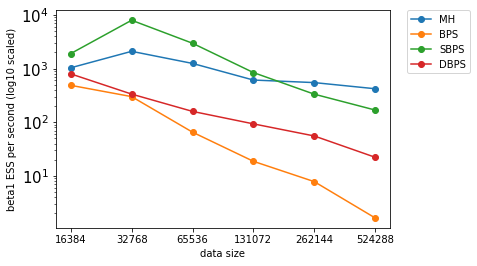

In [46]:
# plt.plot(size, np.log10(np.array(ESS_MH) / MHsetting[:,0]).ravel(), '-o', label = 'MH')
# plt.plot(size, np.log10(np.array(ESS_BPS) / (BPSsetting[:,0]-BPSsetting[:,2])).ravel(), '-o', label = 'BPS')
# plt.plot(size, np.log10(np.array(ESS_SBPS) / (SBPSsetting[:,0]-SBPSsetting[:,2])).ravel(), '-o', label = 'SBPS')
# plt.plot(size, np.log10(np.array(ESS_DBPS) / DBPSsetting[:,0]).ravel(), '-o', label = 'DBPS')


plt.axes(yscale='log')
plt.plot(size, (np.array(ESS_MH) / MHsetting[:,0]).ravel(), '-o', label = 'MH')
plt.plot(size, (np.array(ESS_BPS) / (BPSsetting[:,0]-BPSsetting[:,2])).ravel(), '-o', label = 'BPS')
plt.plot(size, (np.array(ESS_SBPS) / (SBPSsetting[:,0]-SBPSsetting[:,2])).ravel(), '-o', label = 'SBPS')
plt.plot(size, (np.array(ESS_DBPS) / DBPSsetting[:,0]).ravel(), '-o', label = 'DBPS')
plt.yticks(fontsize = 15)

plt.ylabel('beta'+str(beta)+' ESS per second (log10 scaled)')
plt.xlabel('data size')
# y_tick = np.arange(0.5, 4.5, 0.5)
# plt.yticks(range(len(y_tick)), y_tick)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [31]:
y_tick

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

Text(0.5, 0, 'data size')

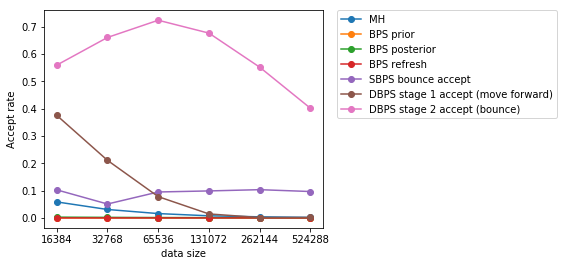

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5,4), tight_layout=False)
iterations = 2e06
ax.plot(size, MHsetting[:,3] / iterations, '-o', label = 'MH')
ax.plot(size, BPSsetting[:,5] / iterations, '-o', label = 'BPS prior')
ax.plot(size, BPSsetting[:,6] / iterations, '-o', label = 'BPS posterior')
ax.plot(size, BPSsetting[:,7] / iterations, '-o', label = 'BPS refresh')
ax.plot(size, SBPSsetting[:,5] / iterations, '-o', label = 'SBPS bounce accept')
ax.plot(size, DBPSsetting[:,3] / iterations, '-o', label = 'DBPS stage 1 accept (move forward)')
ax.plot(size, DBPSsetting[:,4] / iterations, '-o', label = 'DBPS stage 2 accept (bounce)')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Accept rate')
plt.xlabel('data size')

/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


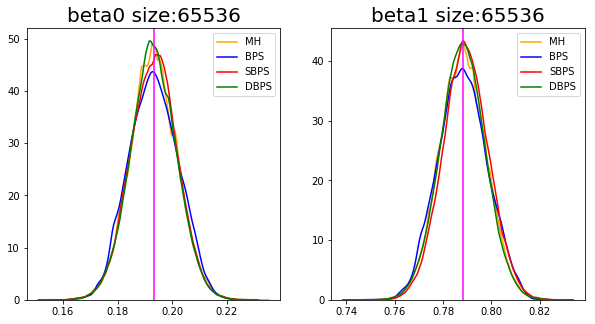

In [18]:
i = 2
cur_size = size[i]

X = np.load('X_' + cur_size + '.npy')
Y = np.load('Y_' + cur_size + '.npy')
mh_samples = np.load('mh_BLR_iterations_2e06_datasize_' + cur_size + '.npy')
b_samples = np.load('bps_BLR_iterations_2e06_datasize_' + cur_size + '.npy')
s_samples = np.load('sbps_BLR_iterations_2e06_datasize_' + cur_size + '.npy')
d_samples = np.load('dbps_BLR_iterations_2e06_datasize_' + cur_size + '.npy')


from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr').fit(X.reshape([len(X),1]), Y)

fig, axs = plt.subplots(1, 2, figsize=(10,5), tight_layout=False)
beta = 0
sns.distplot(mh_samples[:,beta][int(MHsetting[i][2]):], color="orange", label="MH", hist = False, ax = axs[0]).set_title('beta0 size:'+cur_size,fontsize=20)
sns.distplot(b_samples[:,beta][int(BPSsetting[i][4]):], color="blue", label="BPS", hist = False, ax = axs[0]).set_title('beta0 size:'+cur_size,fontsize=20)
sns.distplot(s_samples[:,beta][int(SBPSsetting[i][4]):], color="red", label="SBPS", hist = False, ax = axs[0]).set_title('beta0 size:'+cur_size,fontsize=20)
sns.distplot(d_samples[:,beta][int(DBPSsetting[i][2]):], color="green", label="DBPS", hist = False, ax = axs[0]).set_title('beta0 size:'+cur_size,fontsize=20)
# axs[0].set_xlim([0.15,0.25])
# axs[0].axvline(x = 0.2, color = 'black')
axs[0].axvline(x = clf.intercept_, color = 'fuchsia')
beta = 1
sns.distplot(mh_samples[:,beta][int(MHsetting[i][2]):], color="orange", label="MH", hist = False, ax = axs[1]).set_title('beta1 size:'+cur_size,fontsize=20)
sns.distplot(b_samples[:,beta][int(BPSsetting[i][4]):], color="blue", label="BPS", hist = False, ax = axs[1]).set_title('beta1 size:'+cur_size,fontsize=20)
sns.distplot(s_samples[:,beta][int(SBPSsetting[i][4]):], color="red", label="SBPS", hist = False, ax = axs[1]).set_title('beta1 size:'+cur_size,fontsize=20)
sns.distplot(d_samples[:,beta][int(DBPSsetting[i][2]):], color="green", label="DBPS", hist = False, ax = axs[1]).set_title('beta1 size:'+cur_size,fontsize=20)
# axs[1].set_xlim([0.75,0.85])
# axs[1].axvline(x = 0.8, color = 'black')
axs[1].axvline(x = clf.coef_, color = 'fuchsia')
plt.show()


Text(0.5, 0, 'data size')

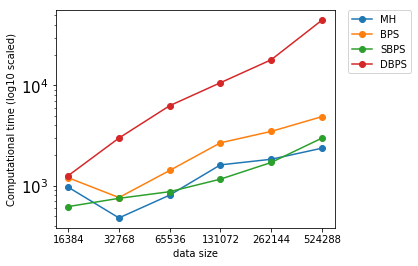

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(5,4), tight_layout=False)
ax = plt.axes(yscale='log')
ax.plot(size, (MHsetting[:,1]), '-o', label = 'MH')
ax.plot(size, (BPSsetting[:,1]-BPSsetting[:,3]), '-o', label = 'BPS')
ax.plot(size, (SBPSsetting[:,1]-SBPSsetting[:,3]), '-o', label = 'SBPS')
ax.plot(size, (DBPSsetting[:,1]), '-o', label = 'DBPS')
plt.yticks(fontsize = 15)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('Computational time (log10 scaled)')
plt.xlabel('data size')